In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.animation as animation
%matplotlib notebook
import numpy as np
import plotly.graph_objects as go

In [2]:
df_netflix=pd.read_csv(r'C:\Users\vivek\Desktop\ml\datasets\Netflix_titles\netflix_titles.csv')

In [3]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df_netflix.shape

(6234, 12)

In [5]:
df_netflix.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df_netflix['date_added']=pd.to_datetime(df_netflix['date_added'])
df_netflix['added_year']=df_netflix['date_added'].dt.year
df_netflix['added_month']=df_netflix['date_added'].dt.month

In [7]:
'''df_netflix['release_year']=pd.to_datetime(df_netflix['release_year'])
df_netflix['released_year']=df_netflix['release_year'].dt.year
df_netflix['released_month']=df_netflix['release_year'].dt.month'''

"df_netflix['release_year']=pd.to_datetime(df_netflix['release_year'])\ndf_netflix['released_year']=df_netflix['release_year'].dt.year\ndf_netflix['released_month']=df_netflix['release_year'].dt.month"

In [8]:
df_netflix.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
added_year             float64
added_month            float64
dtype: object

In [9]:
df_netflix_movies=df_netflix[df_netflix['type']=='Movie']
df_netflix_shows=df_netflix[df_netflix['type']=='TV Show']

In [10]:
df_netflix_movies.shape,df_netflix_shows.shape

((4265, 14), (1969, 14))

In [11]:
df_netflix_movies.reset_index(inplace=True,drop=True)
df_netflix_shows.reset_index(inplace=True,drop=True)

In [12]:
df_netflix.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
added_year       True
added_month      True
dtype: bool

In [13]:
country_missing=df_netflix[df_netflix['country'].isna()==True]

In [14]:
country_missing.head(2)

show_id   type                        title               director  \
10  80169755  Movie  Joaquín Reyes: Una y no más  José Miguel Contreras   
12  80182480  Movie     Krish Trish and Baltiboy                    NaN   

                                                 cast country date_added  \
10                                      Joaquín Reyes     NaN 2017-09-08   
12  Damandeep Singh Baggan, Smita Malhotra, Baba S...     NaN 2017-09-08   

    release_year rating duration                 listed_in  \
10          2017  TV-MA   78 min           Stand-Up Comedy   
12          2009  TV-Y7   58 min  Children & Family Movies   

                                          description  added_year  added_month  
10  Comedian and celebrity impersonator Joaquín Re...      2017.0          9.0  
12  A team of minstrels, including a monkey, cat a...      2017.0          9.0

In [15]:
print(len(df_netflix.listed_in.unique()),len(df_netflix.rating.unique()))

461 15


In [16]:
df_netflix.rating.value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [17]:
df_netflix.country.value_counts()

United States                                                           2032
India                                                                    777
United Kingdom                                                           348
Japan                                                                    176
Canada                                                                   141
South Korea                                                              136
Spain                                                                    117
France                                                                    90
Mexico                                                                    83
Turkey                                                                    79
Australia                                                                 71
Taiwan                                                                    69
Hong Kong                                                                 51

In [18]:
df_india=df_netflix[df_netflix['country'].str.contains('India',na=False)]
df_usa=df_netflix[df_netflix['country'].str.contains('United States',na=False)]
df_spain=df_netflix[df_netflix['country'].str.contains('Spain',na=False)]
df_uk=df_netflix[df_netflix['country'].str.contains('United Kingdom',na=False)]

In [19]:
df_india.shape,df_usa.shape,df_spain.shape,df_uk.shape

((838, 14), (2610, 14), (178, 14), (602, 14))

In [20]:
df_season=df_netflix[df_netflix['duration'].str.contains('Season',na=False)]
df_season.head(2)

show_id     type                             title director  \
2  70234439  TV Show                Transformers Prime      NaN   
3  80058654  TV Show  Transformers: Robots in Disguise      NaN   

                                                cast        country  \
2  Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3  Will Friedle, Darren Criss, Constance Zimmer, ...  United States   

  date_added  release_year    rating  duration listed_in  \
2 2018-09-08          2013  TV-Y7-FV  1 Season  Kids' TV   
3 2018-09-08          2016     TV-Y7  1 Season  Kids' TV   

                                         description  added_year  added_month  
2  With the help of three human allies, the Autob...      2018.0          9.0  
3  When a prison ship crash unleashes hundreds of...      2018.0          9.0

In [21]:
df_netflix['count']=df_netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)

In [22]:
grouped=df_netflix.groupby(df_netflix['type'])

In [23]:
content_type=[]
len_shows=len(df_netflix_movies)
len_movies=len(df_netflix_shows)
content_type.append(len_movies)
content_type.append(len_shows)
content_type

[1969, 4265]

In [24]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

([<matplotlib.patches.Wedge at 0x180776f5e10>,
 [Text(-1.0047215876275912, 0.6561513021819683, 'TV-shows'),
  Text(0.9209947323447457, -0.6014721132298907, 'Movies')],
 [Text(-0.5860875927827616, 0.3827549262728148, '31.6%\n(1968)'),
  Text(0.502360763097134, -0.3280756981253949, '68.4%\n(4264)')])

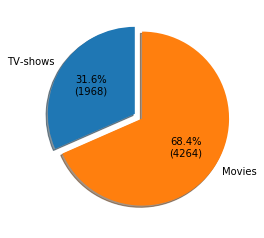

In [25]:
plt.figure()
plt.pie(content_type,labels=['TV-shows','Movies'],shadow=True,startangle=90,explode=(0.10,0),autopct=lambda pct: func(pct, content_type))

In [26]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_month', 'count'],
      dtype='object')

In [27]:
df_netflix.groupby(df_netflix.added_year)
len(df_netflix.groupby(df_netflix.added_year))

13

In [28]:
grouped_added_year=df_netflix.groupby('added_year')

In [29]:
vc1=df_netflix['added_year'].value_counts()
vc2=df_netflix_movies['added_year'].value_counts()
vc3=df_netflix_shows['added_year'].value_counts()
vc1=vc1.sort_index()
vc2=vc2.sort_index()
vc3=vc3.sort_index()

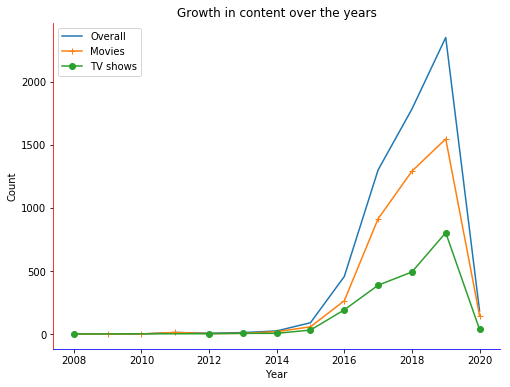

In [30]:
fig=plt.figure(figsize=(8,6))
plt.plot(vc1.index,vc1.values,label='Overall')
plt.plot(vc2.index,vc2.values,'-+',label='Movies')
plt.plot(vc3.index,vc3.values,'-o',label='TV shows')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Growth in content over the years')
plt.legend()
ax=plt.gca()
ax.spines['bottom'].set_color('blue')
ax.spines['left'].set_color('red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [31]:
col = 'added_month'
vc1 = df_netflix[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
#vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

In [32]:
#vc1.set_index('added_month',drop=True)

In [33]:
trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="content", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [34]:
#df_netflix.sort_values('release_year',ascending=False).nlargest(10,'release_year')
df_netflix.sort_values('release_year',ascending=True)

show_id     type                                              title  \
4292  81030762  TV Show                  Pioneers: First Women Filmmakers*   
2011  60027945    Movie                                     Prelude to War   
2013  60027942    Movie                               The Battle of Midway   
2022  80119186    Movie      Undercover: How to Operate Behind Enemy Lines   
2023  70013050    Movie                 Why We Fight: The Battle of Russia   
2026  70022548    Movie                    WWII: Report from the Aleutians   
2017  80119194    Movie   The Memphis Belle: A Story of a\nFlying Fortress   
2019  80119191    Movie                                  The Negro Soldier   
2021  80119189    Movie                                   Tunisian Victory   
2012  80119188    Movie                                         San Pietro   
2009  80119192    Movie                           Nazi Concentration Camps   
2005  80119190    Movie                            Know Your Enemy - Japan   
2930   1005494    Movie                                       The Stranger   
4079  80161851  TV Show                Pioneers of African-American Cinema   
2006  80119187    Movie                                 Let There Be Light   
2020  80119193    Movie                                        Thunderbolt   
2981  60003082    Movie                                    White Christmas   
1401  70031792    Movie                              Rebel Without a Cause   
1369    516788    Movie                                   Forbidden Planet   
1371    542137    Movie                                               Gigi   
1354  70046968    Movie                              Cat on a Hot Tin Roof   
713   80158391    Movie                                              Ujala   
4204  60001407    Movie                       Jis Desh Men Ganga Behti Hai   
1398  60021590    Movie                                     Ocean's Eleven   
709   80158547    Movie                                          Singapore   
1353  60002033    Movie                                      Butterfield 8   
1395  60011729    Movie                               Mutiny on the Bounty   
3153  20257393    Movie                                          Professor   
1389    709380    Movie                                             Lolita   
5981  70172488  TV Show                The Twilight Zone (Original Series)   
...        ...      ...                                                ...   
4834  81140577    Movie                    Dave Chappelle: Sticks & Stones   
4729  81016914  TV Show                                  Tiny House Nation   
2152  81045888  TV Show                                         Green Door   
2113  81033107    Movie                 Alexis Viera: A Story of Surviving   
4854  81145277    Movie                                            Fanatic   
3466  81183491  TV Show                       Jamtara - Sabka Number Ayega   
3427  81060049    Movie                         Leslie Jones: Time Machine   
3436  80239306  TV Show                         The Healing Powers of Dude   
3472  81074060  TV Show                                         Until Dawn   
3467  81011449  TV Show                                     Medical Police   
3426  80221553  TV Show                   Kipo and the Age of Wonderbeasts   
3363  80996973  TV Show                                  Handsome Siblings   
3518  81088083    Movie                                      Ghost Stories   
3562  80201590  TV Show                                       Spinning Out   
3573  81044551  TV Show                                         The Circle   
3325  81160763  TV Show                                     Sex, Explained   
3546  80197991  TV Show  Nisman: The Prosecutor, the President, and the...   
3249  81006825    Movie                      All the Freckles in the World   
3221  80237347  TV Show                                Go! Go! Cory Carson   
3220  80997687  TV Show      

In [35]:
small = df_netflix_shows.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

title  release_year
976     Pioneers: First Women Filmmakers*          1925
933   Pioneers of African-American Cinema          1946
1717  The Twilight Zone (Original Series)          1963
1716               The Andy Griffith Show          1967
1440                            Star Trek          1968
168      Monty Python's Fliegender Zirkus          1972
1405         Monty Python's Flying Circus          1974
1566                           Dad's Army          1977
968                              El Chavo          1979
1003                        Ninja Hattori          1981
248                              Robotech          1985
1752                          Saint Seiya          1986
809                            Shaka Zulu          1986
1510                    Highway to Heaven          1988
99                              High Risk          1988

In [36]:
x1 = df_netflix_movies['duration'].fillna(0.0)
df_netflix_movies['time']=df_netflix_movies.apply(lambda x : x['duration'].split(" ")[0], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



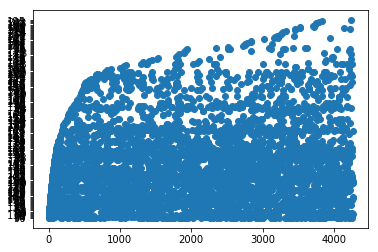

In [37]:
plt.figure()
plt.scatter(df_netflix_movies.index,df_netflix_movies['time'])

In [38]:
import seaborn as sns
sns.set(color_codes=True)

In [39]:
x2=df_netflix_movies['time'].astype(float)

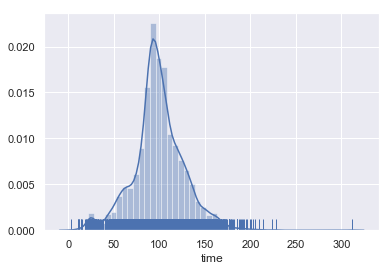

In [40]:
plt.figure()
sns.distplot(x2,rug=True)

In [41]:
import plotly.figure_factory as ff
x1 = df_netflix_movies['time'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [42]:
from collections import Counter
col = "listed_in"
categories = ", ".join(df_netflix_shows['listed_in']).split(", ") 
counter_list=Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace=go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))
print(type(trace))
data=[trace]
layout=go.Layout(title='Most common content',legend=dict(x=0.1,y=1.1,orientation='h'))
fig=go.Figure(data,layout=layout)
fig.show()

<class 'plotly.graph_objs.Bar'>


In [43]:
category=", ".join(df_netflix['listed_in']).split(", ")
print(type(category))
cat_list=[]
for i in category:
    if "&" in i:
        t=i.split(" & ")
        cat_list.append(t[0])
        cat_list.append(t[1])
    else:
        cat_list.append(i) 
list_counter=Counter(cat_list)
list_counter

<class 'list'>


Counter({'Children': 378,
         'Family Movies': 378,
         'Comedies': 1113,
         'Stand-Up Comedy': 323,
         "Kids' TV": 328,
         'Crime TV Shows': 363,
         'International TV Shows': 1001,
         'Spanish-Language TV Shows': 117,
         'International Movies': 1927,
         'Sci-Fi': 193,
         'Fantasy': 261,
         'Thrillers': 392,
         'Docuseries': 279,
         'Science': 67,
         'Nature TV': 67,
         'Action': 597,
         'Adventure': 723,
         'Dramas': 1623,
         'Cult Movies': 55,
         'Independent Movies': 552,
         'Romantic Movies': 376,
         'Documentaries': 668,
         'Horror Movies': 262,
         'Romantic TV Shows': 278,
         'TV Comedies': 436,
         'TV Dramas': 599,
         'TV Thrillers': 44,
         'TV Mysteries': 69,
         'British TV Shows': 210,
         'Music': 243,
         'Musicals': 243,
         'Reality TV': 153,
         'TV Action': 126,
         'Anime Features':

In [44]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - wordcloud


The following NEW packages will be INSTALLED:

  conda-package-han~ conda-forge/win-64::conda-package-handling-1.6.0-py37h702c6c1_2
  matplotlib-base    conda-forge/win-64::matplotlib-base-3.1.1-py37h2852a4a_1
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m
  wordcloud          conda-forge/win-64::wordcloud-1.6.0-py37hfa6e2cd_0

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.6.11-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [45]:
'''from wordcloud import WordCloud,STOPWORDS,ImageGenerator
wordcloud=WordCloud().generate(list_counter)
plt.imshow(wordcloud)'''

'from wordcloud import WordCloud,STOPWORDS,ImageGenerator\nwordcloud=WordCloud().generate(list_counter)\nplt.imshow(wordcloud)'

In [46]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [47]:
import squarify

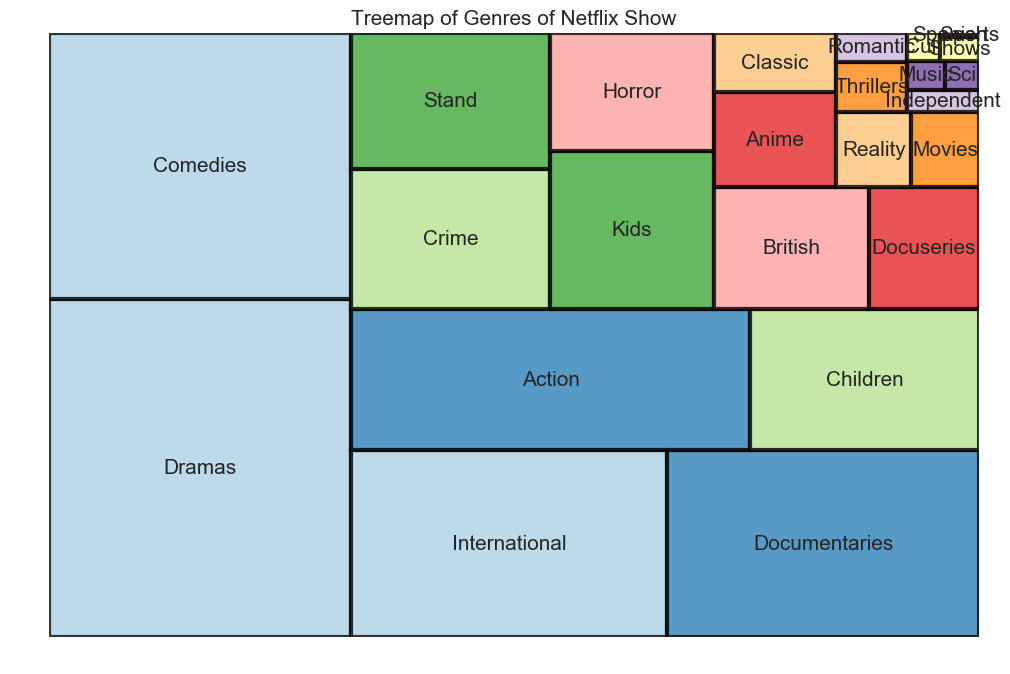

In [48]:
df_netflix['Genres']=df_netflix['listed_in'].str.extract('([A-Z]\w{2,})',expand=True)
temp_df=df_netflix['Genres'].value_counts().reset_index()
sizes=np.array(temp_df['Genres'])
labels=temp_df['index']
colors=[plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8),dpi=100)
squarify.plot(sizes=sizes,color=colors,label=labels,edgecolor='black',alpha=0.75, linewidth=3, text_kwargs={'fontsize':15})
plt.title('Treemap of Genres of Netflix Show', fontsize = 15)
plt.axis('off')
plt.show()

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [50]:
data=df_netflix['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',',' ').split())
test=data
mlb=MultiLabelBinarizer()
res=pd.DataFrame(mlb.fit_transform(test),columns=mlb.classes_)
corr=res.corr()
print(res,corr)


      Action  Adventure  Anime  British  Children  Classic  Comedies  Comedy  \
0          0          0      0        0         1        0         1       0   
1          0          0      0        0         0        0         0       1   
2          0          0      0        0         0        0         0       0   
3          0          0      0        0         0        0         0       0   
4          0          0      0        0         0        0         1       0   
5          0          0      0        0         0        0         0       0   
6          0          0      0        0         0        0         0       0   
7          0          0      0        0         0        0         0       1   
8          0          0      0        0         0        0         0       0   
9          1          1      0        0         0        0         0       0   
10         0          0      0        0         0        0         0       1   
11         1          1      0        0 

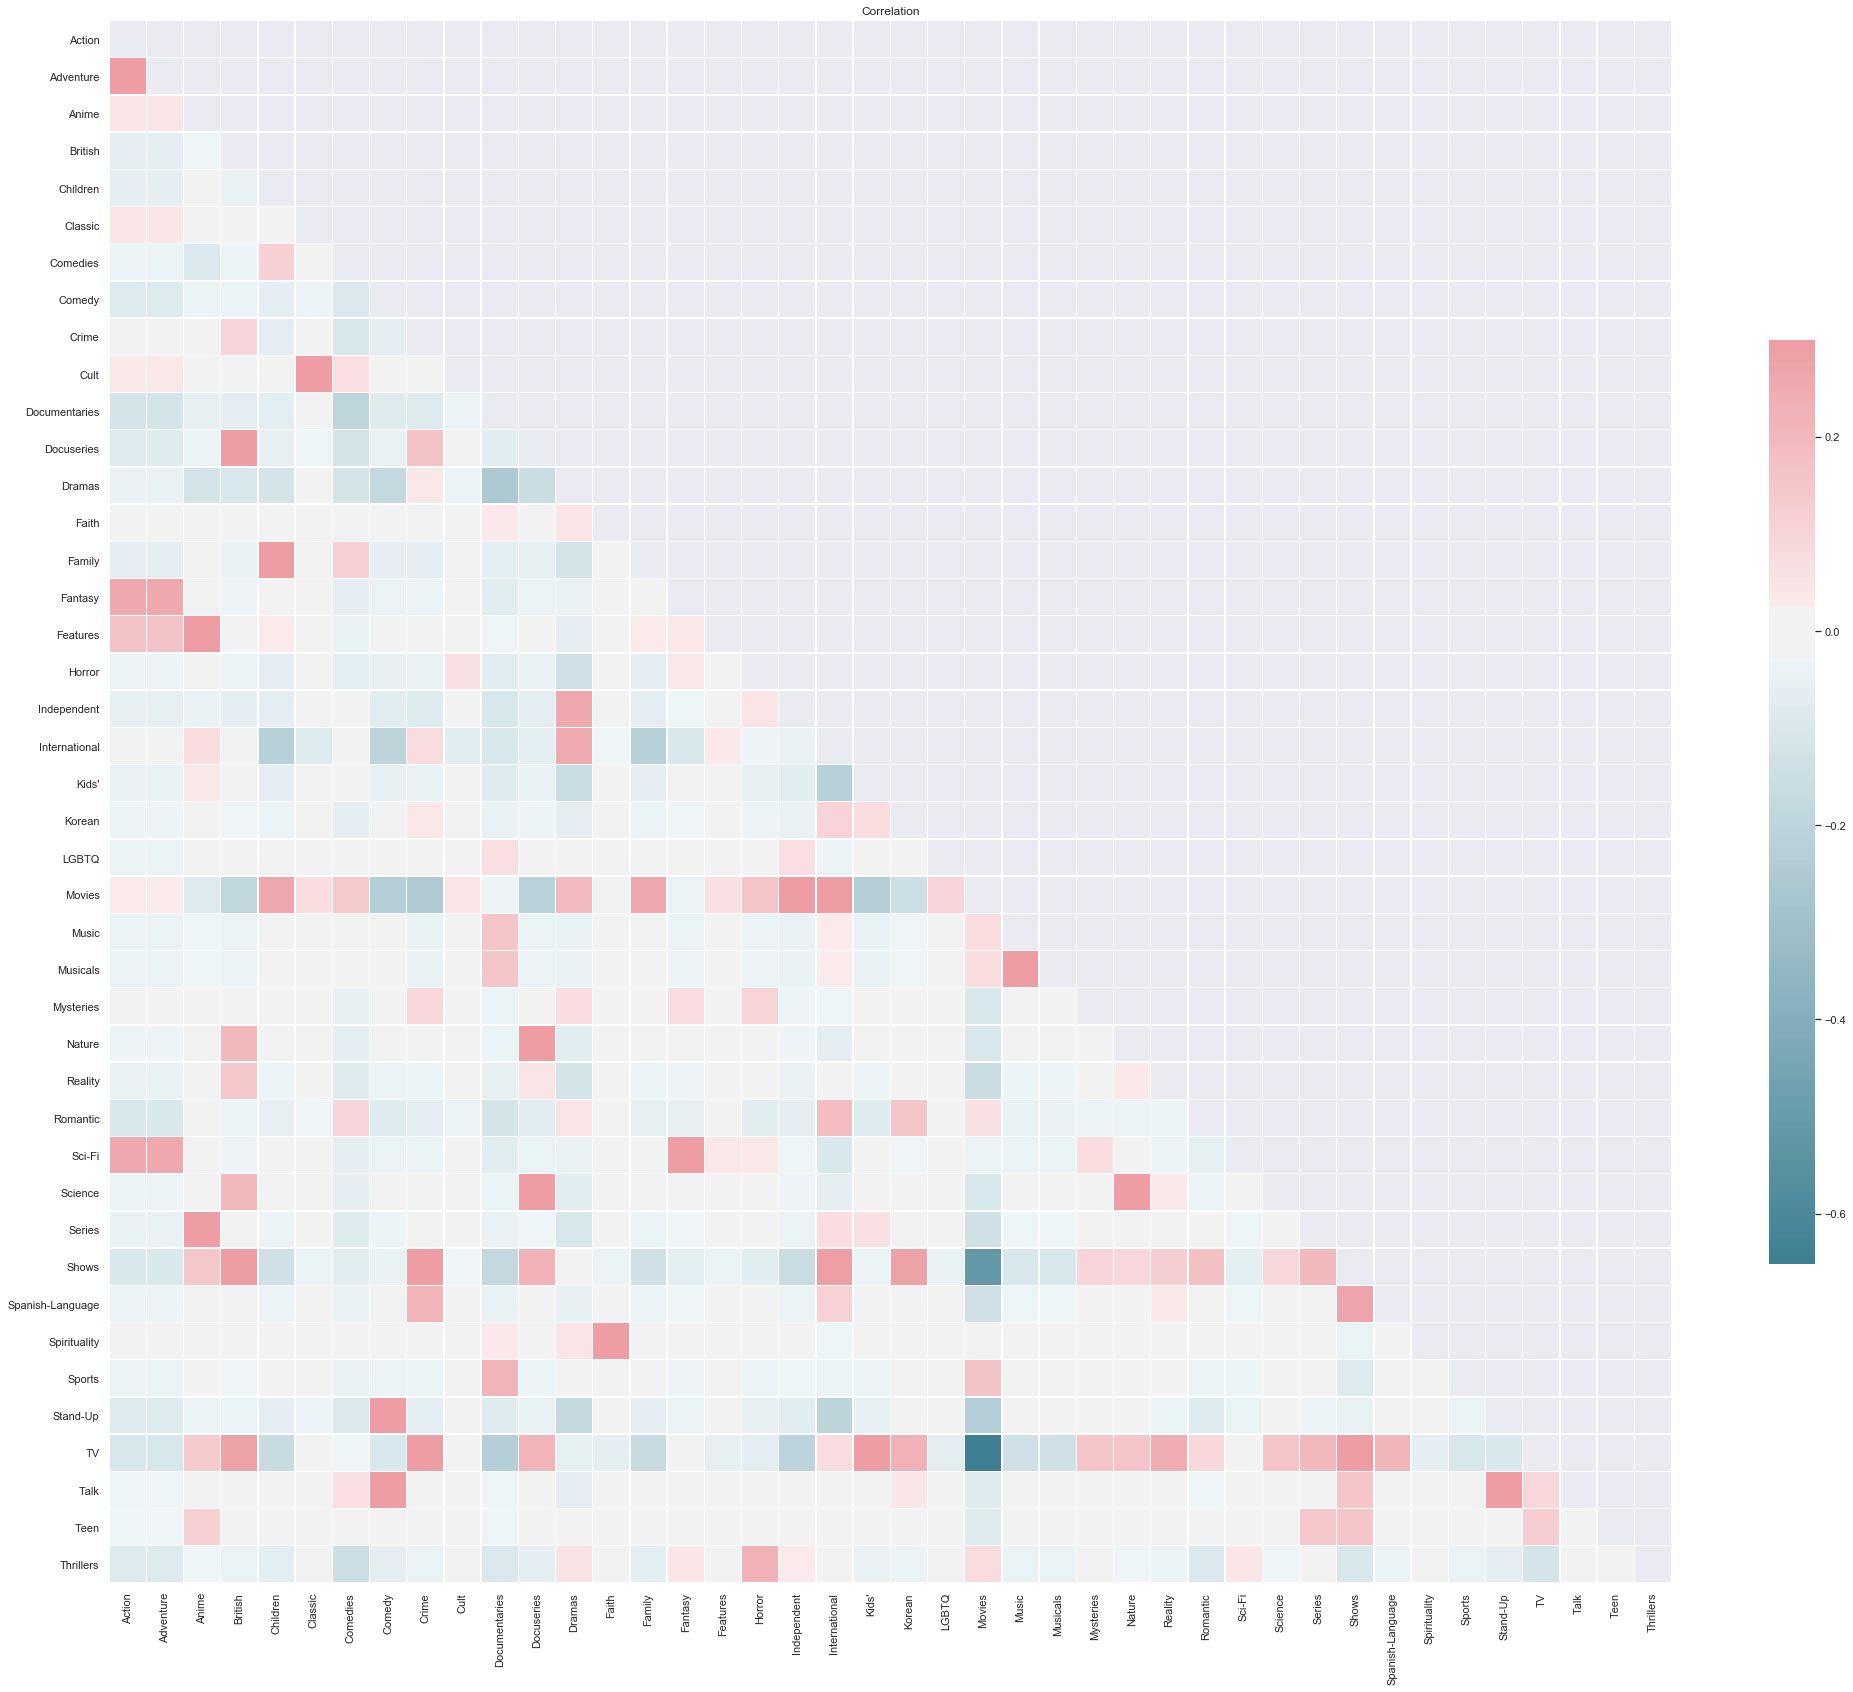

In [51]:
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(35,34))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation')
plt.show()

In [52]:
import networkx as nx

In [53]:
stocks=corr.index.values
cor_matrix=np.asmatrix(corr)
G=nx.from_numpy_matrix(cor_matrix)
G=nx.relabel_nodes(G,lambda x : stocks[x])
G.edges(data=True)

EdgeDataView([('Action', 'Action', {'weight': 1.0}), ('Action', 'Adventure', {'weight': 1.0}), ('Action', 'Anime', {'weight': 0.04475137375361224}), ('Action', 'British', {'weight': -0.05929702767753343}), ('Action', 'Children', {'weight': -0.060536910179787844}), ('Action', 'Classic', {'weight': 0.04021750749431224}), ('Action', 'Comedies', {'weight': -0.03669029625901432}), ('Action', 'Comedy', {'weight': -0.084669057345753}), ('Action', 'Crime', {'weight': -0.01732756225402502}), ('Action', 'Cult', {'weight': 0.03958223008575092}), ('Action', 'Documentaries', {'weight': -0.12223955188232848}), ('Action', 'Docuseries', {'weight': -0.07839983738128523}), ('Action', 'Dramas', {'weight': -0.05094070176817161}), ('Action', 'Faith', {'weight': -0.0199860806726876}), ('Action', 'Family', {'weight': -0.060536910179787844}), ('Action', 'Fantasy', {'weight': 0.26196131147841933}), ('Action', 'Features', {'weight': 0.16440477870748518}), ('Action', 'Horror', {'weight': -0.033454190602748776}),

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



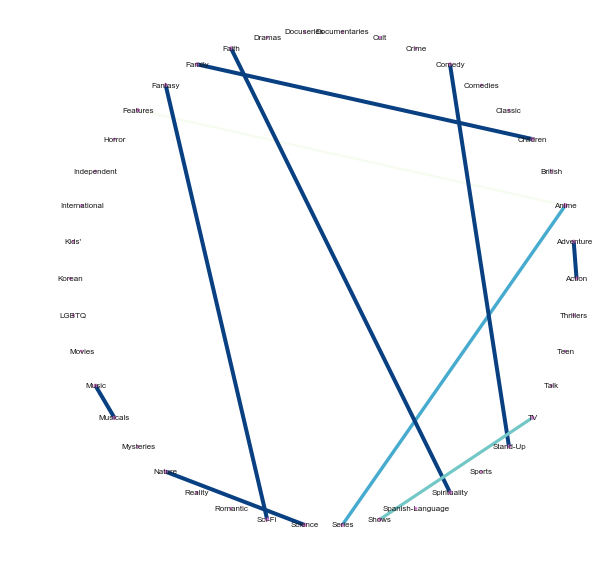

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



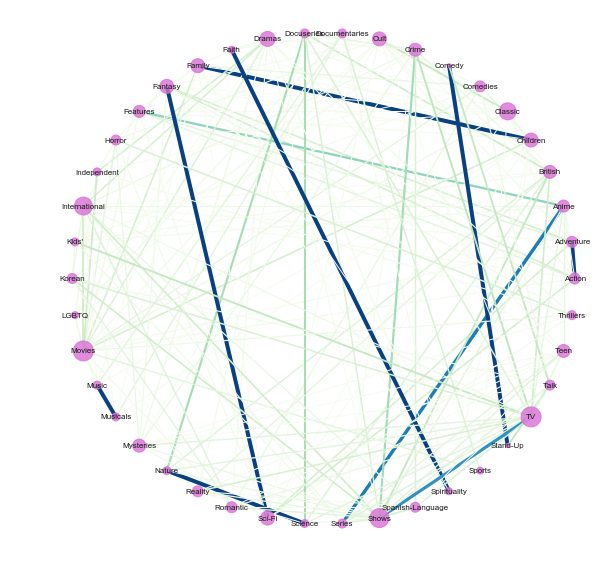

In [54]:
def create_corr_network(G,corr_direction,min_correlation):
    H=G.copy()
    for stock1,stock2,weight in G.edges(data=True):
        if corr_direction=='positive':
            if weight['weight']<0 or weight['weight']<min_correlation:
                H.remove_edge(stock1,stock2)
        else:
            if weight['weight']>=0 or weight['weight']>min_correlation:
                H.remove_edge(stock1,stock2)
    
    edges,weights=zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)
    
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, font_family='sans-serif')
    
    if corr_direction == "positive": 
        edge_colour = plt.cm.GnBu 
    else: 
        edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.5)
create_corr_network(G, 'positive', -1.0)

In [55]:
country_wise_content=df_netflix.country.value_counts().reset_index()[:20]
trace1=go.Bar(x=country_wise_content['index'],y=country_wise_content['country'],width=1.5)
layout=go.Layout(template= "plotly_dark",title = 'TOP 20 COUNTIES WITH MOST CONTENT' ,
                 xaxis = dict(title = 'Countries'),yaxis = dict(title = 'Count'))
fig=go.Figure(data=[trace1],layout=layout)
fig.show()

In [56]:
df_india_movie=df_india[df_india['type']=='Movie']
print(df_india_movie['director'].value_counts())
categories=", ".join(df_india_movie.director.fillna("")).split(", ")
counter_list=Counter(categories).most_common(15)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace=go.Bar(x=labels,y=values)
layout=go.Layout(template='plotly_dark',title='Most Famous Directors',xaxis=dict(title='Directors'),yaxis=dict(title='Count'))
fig=go.Figure(data=[trace],layout=layout)
fig.show()

David Dhawan                                           8
S.S. Rajamouli                                         7
Ram Gopal Varma                                        6
Umesh Mehra                                            5
Ashutosh Gowariker                                     5
Vishal Bhardwaj                                        5
Rajiv Mehra                                            5
Priyadarshan                                           5
Anees Bazmee                                           5
Madhur Bhandarkar                                      5
Imtiaz Ali                                             4
Dibakar Banerjee                                       4
Nishikant Kamat                                        4
Farah Khan                                             4
Subhash Ghai                                           4
Rakeysh Omprakash Mehra                                4
Hrishikesh Mukherjee                                   4
Abbas Alibhai Burmawalla, Masta

In [57]:
categories=", ".join(df_india_movie.cast.fillna("")).split(", ")
counter_list=Counter(categories).most_common(15)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace=go.Bar(x=labels,y=values)
layout=go.Layout(template='plotly_dark',title='Most Famous actors',xaxis=dict(title='Directors'),yaxis=dict(title='Count'))
fig=go.Figure(data=[trace],layout=layout)
fig.show()

### Source: Build a content-based movie recommender system with Natural Language Processing

In [58]:
new_df=df_netflix[['title','director','cast','listed_in','description']]
new_df.head(3)

title                  director  \
0  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1               Jandino: Whatever it Takes                       NaN   
2                       Transformers Prime                       NaN   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...

In [59]:
new_df.isna().any()

title          False
director        True
cast            True
listed_in      False
description    False
dtype: bool

In [60]:
pip install rake_nltk

Note: you may need to restart the kernel to use updated packages.


In [61]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

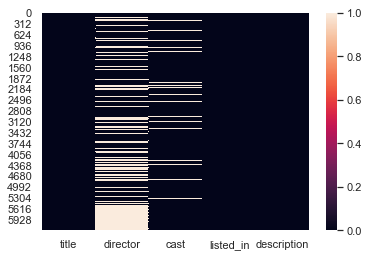

In [62]:
plt.figure()
sns.heatmap(new_df.isna())

In [63]:
new_df.dropna(inplace=True)

In [64]:
new_df.isna().any()

title          False
director       False
cast           False
listed_in      False
description    False
dtype: bool

In [65]:
new_df.head()

title                         director  \
0  Norm of the North: King Sized Adventure         Richard Finn, Tim Maltby   
4                             #realityhigh                 Fernando Lebrija   
6                                 Automata                      Gabe Ibáñez   
7       Fabrizio Copano: Solo pienso en mi  Rodrigo Toro, Francisco Schultz   
9                              Good People                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                           listed_in  \
0                 Children & Family Movies, Comedies   
4                                           Comedies   
6  International Movies, Sci-Fi & Fantasy, Thrillers   
7                                    Stand-Up Comedy   
9                      Action & Adventure, Thrillers   

                                         description  
0  Before planning an awesome wedding for his gra...  
4  When nerdy high schooler Dani finally attracts...  
6  In a dystopian future, an insurance adjuster f...  
7  Fabrizio Copano takes audience participation t...  
9  A struggling couple can't believe their luck w...

In [66]:
for index,row in new_df.iterrows():
    description=row['description']
    r=Rake()
    r.extract_keywords_from_text(description)
    key_words_dict_scores=r.get_word_degrees()
    row['Key_words']=list(key_words_dict_scores.keys())
    #print(row['Key_words'])


In [67]:
new_df.drop(columns=['description'],inplace=True)

In [68]:
new_df['cast'] = new_df['cast'].map(lambda x : x.split(',')[:3])
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))
new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

for index,row in new_df.iterrows():
    print(row)
    row['cast']= [x.lower().replace(',',' ') for x in row['cast']]
    row['director']=''.join(row['director']).lower()

title             Norm of the North: King Sized Adventure
director                    [Richard, Finn,, Tim, Maltby]
cast         [Alan Marriott,  Andrew Toth,  Brian Dobson]
listed_in           [children & family movies,  comedies]
Name: 0, dtype: object
title                                             #realityhigh
director                                   [Fernando, Lebrija]
cast         [Nesta Cooper,  Kate Walsh,  John Michael Higg...
listed_in                                           [comedies]
Name: 4, dtype: object
title                                                 Automata
director                                        [Gabe, Ibáñez]
cast         [Antonio Banderas,  Dylan McDermott,  Melanie ...
listed_in    [international movies,  sci-fi & fantasy,  thr...
Name: 6, dtype: object
title          Fabrizio Copano: Solo pienso en mi
director     [Rodrigo, Toro,, Francisco, Schultz]
cast                            [Fabrizio Copano]
listed_in                       [stand-up com

title                           Inside Man: Most Wanted
director                         [Michael, J., Bassett]
cast         [Aml Ameen,  Rhea Seehorn,  Roxanne McKee]
listed_in                          [action & adventure]
Name: 125, dtype: object
title        Jeff Dunham: Beside Himself
director                  [Troy, Miller]
cast                       [Jeff Dunham]
listed_in              [stand-up comedy]
Name: 126, dtype: object
title                                     China Salesman
director                                     [Tan, Bing]
cast          [Li Dong Xue,  Mike Tyson,  Steven Seagal]
listed_in    [action & adventure,  international movies]
Name: 127, dtype: object
title                                   Swearnet: The Movie
director                               [Warren, P., Sonoda]
cast         [Mike Smith,  John Paul Tremblay,  Robb Wells]
listed_in                 [comedies,  international movies]
Name: 128, dtype: object
title                                       

Name: 286, dtype: object
title        Jeff Dunham: Relative Disaster
director                   [Michael, Simon]
cast                          [Jeff Dunham]
listed_in                 [stand-up comedy]
Name: 288, dtype: object
title                              The Resistance Banker
director                                 [Joram, Lürsen]
cast         [Barry Atsma,  Jacob Derwig,  Pierre Bokma]
listed_in                [dramas,  international movies]
Name: 291, dtype: object
title                                          The Forgotten
director                                  [Oliver, Frampton]
cast         [Clem Tibber,  Elarica Johnson,  James Doherty]
listed_in                                    [horror movies]
Name: 292, dtype: object
title        Bill Burr: Paper Tiger
director             [Mike, Binder]
cast                    [Bill Burr]
listed_in         [stand-up comedy]
Name: 293, dtype: object
title                                         Eat Pray Love
director               

Name: 437, dtype: object
title                                     Seven in Heaven
director                                 [Chris, Eigeman]
cast         [Travis Tope,  Haley Ramm,  Jacinda Barrett]
listed_in                                 [horror movies]
Name: 438, dtype: object
title                                             Kung Fu Yoga
director                                       [Stanley, Tong]
cast               [Jackie Chan,  Disha Patani,  Amyra Dastur]
listed_in    [action & adventure,  comedies,  international...
Name: 440, dtype: object
title                                                 Noblemen
director                                    [Vandana, Kataria]
cast               [Ali Haji,  Kunal Kapoor,  Muskkaan Jaferi]
listed_in    [dramas,  independent movies,  international m...
Name: 444, dtype: object
title                            Cahaya Dari Timur Beta Maluku
director                             [Angga, Dwimas, Sasongko]
cast         [Chicco Jerikho,  Abdurra

Name: 542, dtype: object
title                                        The Hateful Eight
director                                  [Quentin, Tarantino]
cast         [Samuel L. Jackson,  Kurt Russell,  Jennifer J...
listed_in                     [action & adventure,  thrillers]
Name: 544, dtype: object
title        Walt Disney Animation Studios Short Films Coll...
director     [Chris, Buck,, Jennifer, Lee,, Patrick, Osborn...
cast                [Kristen Bell,  Josh Gad,  Jonathan Groff]
listed_in                           [children & family movies]
Name: 545, dtype: object
title                                     Echo in the Canyon
director                                    [Andrew, Slater]
cast         [Jakob Dylan,  Ringo Starr,  Michelle Phillips]
listed_in                 [documentaries,  music & musicals]
Name: 547, dtype: object
title                        Revenge of the Pontianak
director                    [Glen, Goei,, Gavin, Yap]
cast         [Nur Fazura,  Remy Ishak,  Hisy

title        Park Na-rae: Glamour Warning
director                 [Kim, Joo-hyung]
cast                        [Park Na-rae]
listed_in               [stand-up comedy]
Name: 668, dtype: object
title                                               Sinister 2
director                                         [Ciarán, Foy]
cast         [Shannyn Sossamon,  John Beasley,  James Ransone]
listed_in                                      [horror movies]
Name: 670, dtype: object
title                                        The Game Changers
director                                     [Louie, Psihoyos]
cast         [Arnold Schwarzenegger,  Lewis Hamilton,  Jame...
listed_in                      [documentaries,  sports movies]
Name: 671, dtype: object
title        Ron White: If You Quit Listening, I'll Shut Up
director                                     [Tom, Forrest]
cast                                            [Ron White]
listed_in                                 [stand-up comedy]
Name: 672, dt

title          Alpha and Omega 2: A Howl-iday Adventure
director                                [Richard, Rich]
cast         [Ben Diskin,  Kate Higgins,  Blackie Rose]
listed_in                    [children & family movies]
Name: 780, dtype: object
title                                          Bad Boys
director                                 [Michael, Bay]
cast         [Will Smith,  Martin Lawrence,  Téa Leoni]
listed_in               [action & adventure,  comedies]
Name: 781, dtype: object
title                                         Bad Boys II
director                                   [Michael, Bay]
cast         [Will Smith,  Martin Lawrence,  Jordi Mollà]
listed_in                 [action & adventure,  comedies]
Name: 782, dtype: object
title                                                  Blow
director                                       [Ted, Demme]
cast         [Johnny Depp,  Penélope Cruz,  Franka Potente]
listed_in                                          [dramas]
Name:

title                                               My Suicide
director                                  [David, Lee, Miller]
cast         [Gabriel Sunday,  David Carradine,  Mariel Hem...
listed_in             [comedies,  dramas,  independent movies]
Name: 892, dtype: object
title                                    Naan Sigappu Manithan
director                                               [Thiru]
cast              [Vishal,  Lakshmi Menon,  Saranya Ponvannan]
listed_in    [action & adventure,  dramas,  international m...
Name: 893, dtype: object
title                                                    Nasha
director                                        [Amit, Saxena]
cast            [Shivam Patil,  Poonam Pandey,  Sheetal Singh]
listed_in    [dramas,  international movies,  romantic movies]
Name: 894, dtype: object
title                                            Naughty Jatts
director                                       [Pankaj, Batra]
cast               [Neeru Bajwa,  Binnu Dhi

Name: 1073, dtype: object
title                            Hoodwinked Too! Hood vs. Evil
director                                          [Mike, Disa]
cast         [Hayden Panettiere,  Glenn Close,  Patrick War...
listed_in                [children & family movies,  comedies]
Name: 1074, dtype: object
title                                       Akulah Balqis
director                                    [Pali, Yahya]
cast         [Puteri Balqis,  Aeril Zafrel,  Nabila Huda]
listed_in            [international tv shows,  tv dramas]
Name: 1075, dtype: object
title                                                Atlantics
director                                          [Mati, Diop]
cast               [Mama Sane,  Amadou Mbow,  Ibrahima Traore]
listed_in    [dramas,  independent movies,  international m...
Name: 1077, dtype: object
title                                         Crazy people
director                                   [Moses, Inwang]
cast               [Ramsey Nouah,  Chigul,

Name: 1199, dtype: object
title                                                 Sabrina
director                                      [Rocky, Soraya]
cast         [Luna Maya,  Christian Sugiono,  Sara Wijayanto]
listed_in              [horror movies,  international movies]
Name: 1200, dtype: object
title                                                   Target
director                                       [Raditya, Dika]
cast         [Raditya Dika,  Cinta Laura Kiehl,  Samuel Rizal]
listed_in    [comedies,  horror movies,  international movies]
Name: 1201, dtype: object
title        Trevor Noah: Son of Patricia
director             [David, Paul, Meyer]
cast                        [Trevor Noah]
listed_in               [stand-up comedy]
Name: 1203, dtype: object
title                                A Fairly Odd Summer
director                        [Savage, Steve, Holland]
cast         [Drake Bell,  Daniella Monet,  David Lewis]
listed_in          [children & family movies,  comedies]


Name: 1345, dtype: object
title                                       American History X
director                                          [Tony, Kaye]
cast         [Edward Norton,  Edward Furlong,  Beverly D'An...
listed_in                                             [dramas]
Name: 1348, dtype: object
title                                             American Son
director                                         [Kenny, Leon]
cast         [Kerry Washington,  Steven Pasquale,  Jeremy J...
listed_in                                             [dramas]
Name: 1349, dtype: object
title                                      Anger Management
director                                     [Peter, Segal]
cast         [Adam Sandler,  Jack Nicholson,  Marisa Tomei]
listed_in                                        [comedies]
Name: 1350, dtype: object
title                                            Butterfield 8
director                                        [Daniel, Mann]
cast         [Elizabeth Ta

Name: 1470, dtype: object
title                                          Katti Batti
director                                  [Nikhil, Advani]
cast         [Imran Khan,  Kangana Ranaut,  Abhishek Saha]
listed_in       [comedies,  dramas,  international movies]
Name: 1471, dtype: object
title                                      Life in a ... Metro
director                                        [Anurag, Basu]
cast           [Dharmendra,  Irrfan Khan,  Konkona Sen Sharma]
listed_in    [dramas,  international movies,  music & music...
Name: 1472, dtype: object
title        Marc Maron: Thinky Pain
director              [Lance, Bangs]
cast                    [Marc Maron]
listed_in          [stand-up comedy]
Name: 1473, dtype: object
title                                      Morris from America
director                                      [Chad, Hartigan]
cast         [Markees Christmas,  Craig Robinson,  Lina Kel...
listed_in    [dramas,  independent movies,  international m...
Name: 14

title                            Mere Pyare Prime Minister
director                       [Rakeysh, Omprakash, Mehra]
cast         [Anjali Patil,  Om Kanojiya,  Niteesh Wadhwa]
listed_in                  [dramas,  international movies]
Name: 1608, dtype: object
title                                                 P
director                               [Paul, Spurrier]
cast         [Suangporn Jaturaphut,  Opal,  Dor Yodrak]
listed_in        [horror movies,  international movies]
Name: 1609, dtype: object
title                                           Pegasus
director                                     [Han, Han]
cast             [Shen Teng,  Yin Zheng,  Johnny Huang]
listed_in    [comedies,  dramas,  international movies]
Name: 1610, dtype: object
title                                            Ragini MMS
director                                 [Pawan, Kripalani]
cast         [Kainaz Motivala,  Rajkummar Rao,  Rajat Kaul]
listed_in            [horror movies,  international movies

Name: 1733, dtype: object
title                            Take Me Home Tonight
director                             [Michael, Dowse]
cast         [Topher Grace,  Anna Faris,  Dan Fogler]
listed_in                [comedies,  romantic movies]
Name: 1734, dtype: object
title                                           Action Replayy
director                               [Vipul, Amrutlal, Shah]
cast         [Akshay Kumar,  Aishwarya Rai Bachchan,  Om Puri]
listed_in    [children & family movies,  comedies,  interna...
Name: 1736, dtype: object
title                                        Andaz Apna Apna
director                                [Rajkumar, Santoshi]
cast             [Aamir Khan,  Salman Khan,  Raveena Tandon]
listed_in    [comedies,  cult movies,  international movies]
Name: 1737, dtype: object
title                                             Christine
director                                  [Antonio, Campos]
cast         [Rebecca Hall,  Michael C. Hall,  Tracy Letts]
list

Name: 1792, dtype: object
title        Carlos Ballarta: Furia Ñera
director     [Raúl, Campos,, Jan, Suter]
cast                   [Carlos Ballarta]
listed_in              [stand-up comedy]
Name: 1794, dtype: object
title                                 The Kissing Booth
director                              [Vince, Marcello]
cast         [Joey King,  Joel Courtney,  Jacob Elordi]
listed_in                  [comedies,  romantic movies]
Name: 1796, dtype: object
title                             Chhota Bheem Aur Kaala Yodha
director                 [Sidheswar, Shukla,, Asit, Mohapatra]
cast         [Julie Tejwani,  SABINA MALIK,  Jigna Bharadhwaj]
listed_in                                             [movies]
Name: 1799, dtype: object
title                         Chhota Bheem Ka Romani Adventure
director                  [Asit, Mohapatra,, Shyamal, Chaulia]
cast         [Julie Tejwani,  SABINA MALIK,  Jigna Bharadhwaj]
listed_in                           [children & family movies]
Name

Name: 1855, dtype: object
title                                                  Nibunan
director                                  [Arun, Vaidyanathan]
cast              [Arjun,  Prasanna,  Varalakshmi Sarathkumar]
listed_in    [action & adventure,  dramas,  international m...
Name: 1856, dtype: object
title                                                  Onaatah
director                                      [Pradip, Kurbah]
cast         [Sweety Pala,  Merlvin Mukhim,  Richard Kharpuri]
listed_in                      [dramas,  international movies]
Name: 1857, dtype: object
title          Pocoyo & The Space Circus
director            [Alfonso, Rodríguez]
cast         [Stephen Fry,  Carys Doyle]
listed_in                       [movies]
Name: 1859, dtype: object
title                                                Ringan
director                                   [Makarand, Mane]
cast         [Shashank Shende,  Sahil Joshi,  Suhas Sirsat]
listed_in                   [dramas,  internatio

Name: 1965, dtype: object
title                                   Aliens Ate My Homework
director                                      [Sean, McNamara]
cast             [William Shatner,  Dan Payne,  Kirsten Robek]
listed_in    [children & family movies,  comedies,  sci-fi ...
Name: 1968, dtype: object
title                                              Benji
director                                     [Joe, Camp]
cast              [Benji,  Deborah Walley,  Peter Breck]
listed_in    [children & family movies,  classic movies]
Name: 1969, dtype: object
title                                     Benji: Off the Leash
director                                           [Joe, Camp]
cast         [Nick Whitaker,  Chris Kendrick,  Randall News...
listed_in                  [children & family movies,  dramas]
Name: 1970, dtype: object
title                                 For the Love of Benji
director                                        [Joe, Camp]
cast         [Patsy Garrett,  Cynthia Smith,

Name: 2128, dtype: object
title                                                   Zubaan
director                                        [Mozez, Singh]
cast         [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
listed_in    [dramas,  international movies,  music & music...
Name: 2130, dtype: object
title        Malena Pichot: Estupidez compleja
director           [Raúl, Campos,, Jan, Suter]
cast                           [Malena Pichot]
listed_in                    [stand-up comedy]
Name: 2133, dtype: object
title        Natalia Valdebenito: El especial
director          [Raúl, Campos,, Jan, Suter]
cast                    [Natalia Valdebenito]
listed_in                   [stand-up comedy]
Name: 2134, dtype: object
title                                                 Ravenous
director                                       [Robin, Aubert]
cast         [Marc-André Grondin,  Monia Chokri,  Charlotte...
listed_in               [horror movies,  international movies]
Name: 2135, dtype: o

Name: 2270, dtype: object
title                                           Hokkabaz
director             [Ali, Taner, Baltacı,, Cem, Yılmaz]
cast         [Cem Yılmaz,  Mazhar Alanson,  Özlem Tekin]
listed_in     [comedies,  dramas,  international movies]
Name: 2271, dtype: object
title                                       Hükümet Kadin
director                               [Sermiyan, Midyat]
cast         [Demet Akbağ,  Sermiyan Midyat,  Mahir İpek]
listed_in               [comedies,  international movies]
Name: 2272, dtype: object
title                                     Hükümet Kadin 2
director                               [Sermiyan, Midyat]
cast         [Demet Akbağ,  Sermiyan Midyat,  Mahir İpek]
listed_in               [comedies,  international movies]
Name: 2273, dtype: object
title                                           Incir Receli 2
director                                      [Aytaç, Ağırlar]
cast         [Halil Sezai Paracıkoğlu,  Şafak Pekdemir,  Ah...
listed_in    [d

Name: 2378, dtype: object
title                                                  Swades
director                                [Ashutosh, Gowariker]
cast         [Shah Rukh Khan,  Gayatri Joshi,  Kishori Balal]
listed_in                     [dramas,  international movies]
Name: 2379, dtype: object
title                                            Swearnet Live
director     [Mike, Smith,, John, Paul, Tremblay,, Robb, We...
cast            [Mike Smith,  John Paul Tremblay,  Robb Wells]
listed_in                    [comedies,  international movies]
Name: 2380, dtype: object
title                                                     Taal
director                                       [Subhash, Ghai]
cast         [Anil Kapoor,  Aishwarya Rai Bachchan,  Akshay...
listed_in    [dramas,  international movies,  music & music...
Name: 2381, dtype: object
title                                            Tarif de nuit
director                                        [Julien, Seri]
cast         [Jona

title                                             Super Deluxe
director                             [Thiagarajan, Kumararaja]
cast         [Vijay Sethupathi,  Fahadh Faasil,  Samantha R...
listed_in           [comedies,  dramas,  international movies]
Name: 2501, dtype: object
title                                            Calibre
director                                  [Matt, Palmer]
cast         [Jack Lowden,  Martin McCann,  Tony Curran]
listed_in    [dramas,  international movies,  thrillers]
Name: 2502, dtype: object
title        Jani Dueñas: Grandes fracasos de ayer y hoy
director                     [Raúl, Campos,, Jan, Suter]
cast                                       [Jani Dueñas]
listed_in                              [stand-up comedy]
Name: 2504, dtype: object
title                                             Penalty Kick
director                                     [Rodrigo, Triana]
cast         [Adrián Uribe,  Julieth Restrepo,  Carlos Manu...
listed_in           [come

Name: 2677, dtype: object
title        Jo Koy: Comin' In Hot
director        [Shannon, Hartman]
cast                      [Jo Koy]
listed_in        [stand-up comedy]
Name: 2678, dtype: object
title        Rolling Thunder Revue: A Bob Dylan Story by Ma...
director                                    [Martin, Scorsese]
cast                  [Bob Dylan,  Allen Ginsberg,  Joan Baez]
listed_in                   [documentaries,  music & musicals]
Name: 2679, dtype: object
title                                    My Daddy is in Heaven
director                                       [Waymon, Boone]
cast         [Jenn Gotzon Chandler,  Corbin Bernsen,  Loren...
listed_in                      [dramas,  faith & spirituality]
Name: 2681, dtype: object
title              Ralph Breaks the Internet: Wreck-It Ralph 2
director                        [Phil, Johnston,, Rich, Moore]
cast         [John C. Reilly,  Sarah Silverman,  Taraji P. ...
listed_in                [children & family movies,  comedies]


Name: 2821, dtype: object
title                                         The Croods
director              [Kirk, De, Micco,, Chris, Sanders]
cast         [Nicolas Cage,  Emma Stone,  Ryan Reynolds]
listed_in          [children & family movies,  comedies]
Name: 2822, dtype: object
title                                                      Her
director                                        [Spike, Jonze]
cast         [Joaquin Phoenix,  Scarlett Johansson,  Amy Ad...
listed_in        [dramas,  romantic movies,  sci-fi & fantasy]
Name: 2824, dtype: object
title                                               Tallulah
director                                       [Sian, Heder]
cast         [Ellen Page,  Allison Janney,  Tammy Blanchard]
listed_in                      [dramas,  independent movies]
Name: 2825, dtype: object
title                                Da Kath & Kim Code
director                                   [Ted, Emery]
cast         [Jane Turner,  Gina Riley,  Glenn Robbins]
list

Name: 2940, dtype: object
title                           Mary and the Witch's Flower
director                            [Hiromasa, Yonebayashi]
cast         [Ruby Barnhill,  Kate Winslet,  Jim Broadbent]
listed_in       [anime features,  children & family movies]
Name: 2942, dtype: object
title                                   Uncertain Glory
director                           [Agustí, Villaronga]
cast         [Marcel Borràs,  Bruna Cusí,  Nuria Prims]
listed_in               [dramas,  international movies]
Name: 2943, dtype: object
title                                       Tig
director     [Kristina, Goolsby,, Ashley, York]
cast                               [Tig Notaro]
listed_in     [documentaries,  stand-up comedy]
Name: 2944, dtype: object
title                                                    Bogda
director                                      [Nisheeta, Keni]
cast         [Suhas Joshi,  Mrunmayee Deshpande,  Rohit Kok...
listed_in                      [dramas,  internatio

title                                             Shorts
director                             [Robert, Rodriguez]
cast         [Jimmy Bennett,  Jake Short,  Kat Dennings]
listed_in          [children & family movies,  comedies]
Name: 3075, dtype: object
title                                             Soul to Keep
director                        [David, Allensworth,, Monière]
cast         [Sandra Mae Frank,  Aurora Heimbach,  Craig Fo...
listed_in                 [horror movies,  independent movies]
Name: 3076, dtype: object
title                                   Starsky & Hutch
director                               [Todd, Phillips]
cast         [Ben Stiller,  Owen Wilson,  Vince Vaughn]
listed_in               [action & adventure,  comedies]
Name: 3077, dtype: object
title                                                   Swiped
director                               [Ann, Deborah, Fishman]
cast         [Kendall Ryan Sanders,  Noah Centineo,  Nathan...
listed_in                    

Name: 3195, dtype: object
title                                          The Tourist
director             [Florian, Henckel, von, Donnersmarck]
cast         [Angelina Jolie,  Johnny Depp,  Paul Bettany]
listed_in           [action & adventure,  romantic movies]
Name: 3196, dtype: object
title                                            Komola Rocket
director                                  [Noor, Imran, Mithu]
cast                [Tauquir Ahmed,  Mosharraf Karim,  Joyraj]
listed_in    [dramas,  independent movies,  international m...
Name: 3198, dtype: object
title                                               Pahuna
director                                [Paakhi, Tyrewala]
cast         [Anmol Limbu,  Ishika Gurung,  Manju Chettri]
listed_in       [comedies,  dramas,  international movies]
Name: 3199, dtype: object
title                        Miss Sharon Jones!
director                      [Barbara, Kopple]
cast                             [Sharon Jones]
listed_in    [documentaries,

title                                  Mustang Island
director                               [Craig, Elrod]
cast         [Macon Blair,  Lee Eddy,  John Merriman]
listed_in    [comedies,  dramas,  independent movies]
Name: 3330, dtype: object
title        Auschwitz: Blueprints of Genocide
director                      [Mike, Rossiter]
cast                             [Roy Marsden]
listed_in                      [documentaries]
Name: 3332, dtype: object
title        Harith Iskander: I Told You So
director                   [Michael, McKay]
cast                      [Harith Iskander]
listed_in                 [stand-up comedy]
Name: 3333, dtype: object
title                                            Step Sisters
director                                [Charles, Stone, III]
cast         [Megalyn Echikunwoke,  Eden Sher,  Lyndon Smith]
listed_in                                          [comedies]
Name: 3334, dtype: object
title                                           The Open House
direc

Name: 3483, dtype: object
title                                 Arthur Christmas
director                                [Sarah, Smith]
cast         [James McAvoy,  Hugh Laurie,  Bill Nighy]
listed_in        [children & family movies,  comedies]
Name: 3484, dtype: object
title                                       Aruna & Her Palate
director                                               [Edwin]
cast         [Dian Sastrowardoyo,  Oka Antara,  Hannah Al R...
listed_in                      [dramas,  international movies]
Name: 3485, dtype: object
title                                  As Good as It Gets
director                              [James, L., Brooks]
cast         [Jack Nicholson,  Helen Hunt,  Greg Kinnear]
listed_in                    [comedies,  romantic movies]
Name: 3486, dtype: object
title                                           Bad Grandpa .5
director                                      [Jeff, Tremaine]
cast         [Johnny Knoxville,  Jackson Nicoll,  Greg Harris]
lis

Name: 3598, dtype: object
title                      Willy Wonka & the Chocolate Factory
director                                         [Mel, Stuart]
cast             [Gene Wilder,  Jack Albertson,  Peter Ostrum]
listed_in    [children & family movies,  classic movies,  c...
Name: 3599, dtype: object
title                                           Wyatt Earp
director                                [Lawrence, Kasdan]
cast         [Kevin Costner,  Dennis Quaid,  Gene Hackman]
listed_in                             [action & adventure]
Name: 3600, dtype: object
title                                                Yes Man
director                                      [Peyton, Reed]
cast         [Jim Carrey,  Zooey Deschanel,  Bradley Cooper]
listed_in                       [comedies,  romantic movies]
Name: 3601, dtype: object
title                                    A Perfect Ending
director                                   [Nicole, Conn]
cast         [Barbara Niven,  Jessica Clark,  Jo

Name: 3749, dtype: object
title                                      Don't Knock Twice
director                                [Caradog, W., James]
cast         [Katee Sackhoff,  Lucy Boynton,  Richard Mylan]
listed_in             [horror movies,  international movies]
Name: 3750, dtype: object
title                                 High Flying Bird
director                          [Steven, Soderbergh]
cast         [André Holland,  Zazie Beetz,  Bill Duke]
listed_in                     [dramas,  sports movies]
Name: 3751, dtype: object
title                          Incredibles 2 (Spanish Version)
director                                          [Brad, Bird]
cast         [Víctor Trujillo,  Consuelo Duval,  Darío T. Pie]
listed_in                [children & family movies,  comedies]
Name: 3752, dtype: object
title                   Kevin Hart's Guide to Black History
director                                       [Tom, Stern]
cast         [Kevin Hart,  Saniyya Sidney,  Lil Rel Howery]


Name: 3886, dtype: object
title                         Await Further Instructions
director                             [Johnny, Kevorkian]
cast         [Sam Gittins,  Grant Masters,  Neerja Naik]
listed_in             [horror movies,  sci-fi & fantasy]
Name: 3887, dtype: object
title                                              Manusangada
director                                       [Amshan, Kumar]
cast            [Rajeev Anand,  Manimegalai,  A.S. Sasi Kumar]
listed_in    [dramas,  independent movies,  international m...
Name: 3888, dtype: object
title                                        Viking Destiny
director                              [David, L.G., Hughes]
cast         [Anna Demetriou,  Timo Nieminen,  Will Mellor]
listed_in           [action & adventure,  sci-fi & fantasy]
Name: 3890, dtype: object
title        Kavin Jay: Everybody Calm Down!
director                    [Michael, McKay]
cast                             [Kavin Jay]
listed_in                  [stand-up come

title                                            Dear Ex
director                      [Hsu, Chih-yen,, Mag, Hsu]
cast         [Roy Chiu,  Hsieh Ying-xuan,  Joseph Huang]
listed_in     [comedies,  dramas,  international movies]
Name: 4012, dtype: object
title        E-Cigarettes: Miracle or Menace?
director                    [Emma, Hatherley]
cast                         [Michael Mosley]
listed_in                     [documentaries]
Name: 4013, dtype: object
title                                                  Guilty
director                                     [Meghna, Gulzar]
cast         [Irrfan Khan,  Konkona Sen Sharma,  Neeraj Kabi]
listed_in                     [dramas,  international movies]
Name: 4015, dtype: object
title                    Have You Seen the Listers?
director                            [Eddie, Martin]
cast                               [Anthony Lister]
listed_in    [documentaries,  international movies]
Name: 4017, dtype: object
title                       

Name: 4175, dtype: object
title                                                    Anwar
director                                         [Manish, Jha]
cast         [Siddharth Koirala,  Nauheed Cyrusi,  Manisha ...
listed_in    [dramas,  independent movies,  international m...
Name: 4176, dtype: object
title                                            Barah Aana
director                                      [Raja, Menon]
cast         [Naseeruddin Shah,  Arjun Mathur,  Vijay Raaz]
listed_in                   [dramas,  international movies]
Name: 4178, dtype: object
title                                           Bawarchi
director                         [Hrishikesh, Mukherjee]
cast         [Rajesh Khanna,  A.K. Hangal,  Durga Khote]
listed_in           [classic movies,  comedies,  dramas]
Name: 4179, dtype: object
title                                                   Bazaar
director                                      [Sagar, Sarhadi]
cast          [Farooq Shaikh,  Smita Patil,  Nasee

title                                     Avicii: True Stories
director                                [Levan, Tsikurishvili]
cast                                                  [Avicii]
listed_in    [documentaries,  international movies,  music ...
Name: 4314, dtype: object
title                                     Life Ki Toh Lag Gayi
director                                       [Rakesh, Mehta]
cast         [Kay Kay Menon,  Ranvir Shorey,  Manu Rishi Ch...
listed_in             [action & adventure,  comedies,  dramas]
Name: 4317, dtype: object
title                                        Oasis: Supersonic
director                                     [Mat, Whitecross]
cast                      [Oasis,  Alan McGee,  Paul McGuigan]
listed_in    [documentaries,  international movies,  music ...
Name: 4319, dtype: object
title                                        When Angels Sleep
director                                    [Gonzalo, Bendala]
cast         [Julián Villagrán,  Marian 

title                                        Maps to the Stars
director                                   [David, Cronenberg]
cast         [Julianne Moore,  Mia Wasikowska,  Robert Patt...
listed_in                                  [comedies,  dramas]
Name: 4472, dtype: object
title                                        One Day
director                            [Lone, Scherfig]
cast         [Rafe Spall,  Jim Sturgess,  Ken Stott]
listed_in                 [dramas,  romantic movies]
Name: 4473, dtype: object
title        Springsteen on Broadway
director               [Thom, Zimny]
cast             [Bruce Springsteen]
listed_in         [music & musicals]
Name: 4474, dtype: object
title                             The Theory of Everything
director                                    [James, Marsh]
cast         [Emily Watson,  Charlie Cox,  Felicity Jones]
listed_in                       [dramas,  romantic movies]
Name: 4475, dtype: object
title                                           

title                             Don't Go Breaking My Heart 2
director                                         [Johnnie, To]
cast         [Louis Koo,  Gao Yuanyuan,  Miriam Chin Wah Ye...
listed_in    [comedies,  international movies,  romantic mo...
Name: 4656, dtype: object
title                                                   Faraar
director                                  [Baljit, Singh, Deo]
cast              [Kainaat Arora,  Jaggi Singh,  Gippy Grewal]
listed_in    [action & adventure,  dramas,  international m...
Name: 4657, dtype: object
title                                             Helios
director              [Leung, Lok, Man,, Luk, Kim-ching]
cast           [Jacky Cheung,  Nick Cheung,  Chang Chen]
listed_in    [action & adventure,  international movies]
Name: 4659, dtype: object
title                                                  Hellboy
director                                [Guillermo, del, Toro]
cast                   [Ron Perlman,  John Hurt,  Selma Blair]
l

title                                                     Expo
director                                        [Joseph, Mbah]
cast         [Derek Davenport,  Amelia Haberman,  Shepsut W...
listed_in    [action & adventure,  dramas,  independent mov...
Name: 4817, dtype: object
title                                         Falling Inn Love
director                                       [Roger, Kumble]
cast         [Christina Milian,  Adam Demos,  Jeffrey Bowye...
listed_in                         [comedies,  romantic movies]
Name: 4818, dtype: object
title                                                   Kardec
director                                   [Wagner, de, Assis]
cast         [Leonardo Medeiros,  Sandra Corveloni,  Genezi...
listed_in    [dramas,  faith & spirituality,  international...
Name: 4819, dtype: object
title                                               Starred Up
director                                    [David, Mackenzie]
cast         [Jack O'Connell,  Ben Mende

Name: 4930, dtype: object
title                                        The Blue Umbrella
director                                    [Vishal, Bhardwaj]
cast          [Pankaj Kapur,  Shreya Sharma,  Dolly Ahluwalia]
listed_in    [children & family movies,  dramas,  independe...
Name: 4931, dtype: object
title        Lavell Crawford: Can a Brother Get Some Love?
director                                  [Michael, Drumm]
cast                                     [Lavell Crawford]
listed_in                                [stand-up comedy]
Name: 4932, dtype: object
title                                            Attitude Test
director                   [Fabrizio, Copano,, Augusto, Matte]
cast         [Belén Soto,  Denise Rosenthal,  Constanza Pic...
listed_in    [comedies,  independent movies,  international...
Name: 4933, dtype: object
title                                     Barrio Universitario
director                                      [Esteban, Vidal]
cast         [Fabrizio Copano,

Name: 5092, dtype: object
title                                 History of Joy
director                         [Vishnu, Govindhan]
cast         [Vishnu Vinay,  Vinay Forrt,  Saikumar]
listed_in            [dramas,  international movies]
Name: 5093, dtype: object
title                                          Initial D
director            [Andrew, Lau, Wai-Keung,, Alan, Mak]
cast              [Jay Chou,  Anne Suzuki,  Edison Chen]
listed_in    [action & adventure,  international movies]
Name: 5094, dtype: object
title                                                Invisible
director                                    [Pablo, Giorgelli]
cast         [Mora Arenillas,  Mara Bestelli,  Diego Cremon...
listed_in    [dramas,  independent movies,  international m...
Name: 5095, dtype: object
title                                                 Kaaliyan
director                                       [Jijo, Pancode]
cast         [Tini Tom,  Meghanathan,  Balachandran Chullik...
listed_in      

Name: 5224, dtype: object
title                                           Bir Baba Hindu
director                                    [Sermiyan, Midyat]
cast            [Sermiyan Midyat,  Şafak Sezer,  Nicole Faria]
listed_in    [action & adventure,  comedies,  international...
Name: 5225, dtype: object
title                                             Ekşi Elmalar
director                                     [Yılmaz, Erdoğan]
cast         [Yılmaz Erdoğan,  Farah Zeynep Abdullah,  Song...
listed_in                      [dramas,  international movies]
Name: 5226, dtype: object
title                                                  Görümce
director                                     [Kıvanç, Baruönü]
cast                     [Eda Ece,  Dilşah Demir,  Gupse Özay]
listed_in    [comedies,  international movies,  music & mus...
Name: 5227, dtype: object
title                                            Hadi İnşallah
director                                 [Ali, Taner, Baltacı]
cast          

Name: 5301, dtype: object
title                                     The Consul's Son
director                                      [Amr, Arafa]
cast          [Khaled Saleh,  Ghada Adel,  Ahmed el-Sakka]
listed_in    [comedies,  international movies,  thrillers]
Name: 5302, dtype: object
title                      The Hateful Eight: Extended Version
director                                  [Quentin, Tarantino]
cast         [Samuel L. Jackson,  Kurt Russell,  Jennifer J...
listed_in                                           [tv shows]
Name: 5303, dtype: object
title                                         The Ugly Truth
director                                   [Robert, Luketic]
cast         [Katherine Heigl,  Gerard Butler,  Eric Winter]
listed_in                       [comedies,  romantic movies]
Name: 5304, dtype: object
title                                   Bill Nye: Science Guy
director                  [Jason, Sussberg,, David, Alvarado]
cast         [Bill Nye,  Neil deGrasse T

Name: 5379, dtype: object
title           Lucas Brothers: On Drugs
director                  [Jay, Chapman]
cast         [Keith Lucas,  Kenny Lucas]
listed_in              [stand-up comedy]
Name: 5380, dtype: object
title                                           A Little Chaos
director                                       [Alan, Rickman]
cast         [Kate Winslet,  Matthias Schoenaerts,  Alan Ri...
listed_in    [dramas,  independent movies,  international m...
Name: 5381, dtype: object
title                            Dabbe 6: The Return
director                          [Hasan, Karacadağ]
cast         [Sema Şimşek,  Nilay Gök,  Volkan Ünal]
listed_in     [horror movies,  international movies]
Name: 5382, dtype: object
title                               De Film van Dylan Haegens
director               [Dylan, Haegens,, Bas, van, Teylingen]
cast         [Dylan Haegens,  Nick Golterman,  Marit Brugman]
listed_in                   [comedies,  international movies]
Name: 5383, dtype: o

Name: 5480, dtype: object
title                                     P.S. I Love You
director                           [Richard, LaGravenese]
cast         [Hilary Swank,  Gerard Butler,  Lisa Kudrow]
listed_in                      [dramas,  romantic movies]
Name: 5482, dtype: object
title                                                 Penelope
director                                      [Mark, Palansky]
cast         [Christina Ricci,  James McAvoy,  Catherine O'...
listed_in    [children & family movies,  comedies,  romanti...
Name: 5484, dtype: object
title                                            Pinky Memsaab
director                                   [Shazia, Ali, Khan]
cast               [Hajira Yamin,  Kiran Malik,  Adnan Jaffar]
listed_in    [dramas,  independent movies,  international m...
Name: 5485, dtype: object
title                                        Sherlock Holmes
director                                      [Guy, Ritchie]
cast         [Robert Downey Jr.,  Jude

title                                         Leyla and Mecnun
director                                          [Onur, Ünlü]
cast                 [Ali Atay,  Melis Birkan,  Serkan Keskin]
listed_in    [international tv shows,  romantic tv shows,  ...
Name: 6213, dtype: object


In [69]:
new_df.set_index('title',inplace=True)
new_df.head(10)

director  \
title                                                                          
Norm of the North: King Sized Adventure                richardfinn,timmaltby   
#realityhigh                                                 fernandolebrija   
Automata                                                          gabeibáñez   
Fabrizio Copano: Solo pienso en mi              rodrigotoro,franciscoschultz   
Good People                                                  henrikrubengenz   
Joaquín Reyes: Una y no más                              josémiguelcontreras   
Kidnapping Mr. Heineken                                      danielalfredson   
Krish Trish and Baltiboy: Battle of Wits            munjalshroff,tilakshetty   
Krish Trish and Baltiboy: Best Friends Forever      munjalshroff,tilakshetty   
Krish Trish and Baltiboy: Comics of India                        tilakshetty   

                                                                                             cast  \
title                                                                                               
Norm of the North: King Sized Adventure              [alan marriott,  andrew toth,  brian dobson]   
#realityhigh                                    [nesta cooper,  kate walsh,  john michael higg...   
Automata                                        [antonio banderas,  dylan mcdermott,  melanie ...   
Fabrizio Copano: Solo pienso en mi                                              [fabrizio copano]   
Good People                                          [james franco,  kate hudson,  tom wilkinson]   
Joaquín Reyes: Una y no más                                                       [joaquín reyes]   
Kidnapping Mr. Heineken                           [jim sturgess,  sam worthington,  ryan kwanten]   
Krish Trish and Baltiboy: Battle of Wits        [damandeep singh baggan,  smita malhotra,  bab...   
Krish Trish and Baltiboy: Best Friends Forever  [damandeep singh baggan,  smita malhotra,  dee...   
Krish Trish and Baltiboy: Comics of India       [damandeep singh baggan,  smita malhotra,  bab...   

                                                                                        listed_in  
title                                                                                              
Norm of the North: King Sized Adventure                     [children & family movies,  comedies]  
#realityhigh                                                                           [comedies]  
Automata                                        [international movies,  sci-fi & fantasy,  thr...  
Fabrizio Copano: Solo pienso en mi                                              [stand-up comedy]  
Good People                                                      [action & adventure,  thrillers]  
Joaquín Reyes: Una y no más                                                     [stand-up comedy]  
Kidnapping Mr. Heineken                         [action & adventure,  dramas,  international m...  
Krish Trish and Baltiboy: Battle of Wits                               [children & family movies]  
Krish Trish and Baltiboy: Best Friends Forever                         [children & family movies]  
Krish Trish and Baltiboy: Comics of India                              [children & family movies]

In [71]:
new_df['bag_of_words']=""
columns=new_df.columns
for index,row in new_df.iterrows():
    words= ""
    for col in columns:
        if col != 'director':
            words= words + ' '.join(row[col])+ ' '
        else:
            words= words + row[col] + ' '
    row['bag_of_words']=words

In [72]:
new_df.head(3)

director  \
title                                                            
Norm of the North: King Sized Adventure  richardfinn,timmaltby   
#realityhigh                                   fernandolebrija   
Automata                                            gabeibáñez   

                                                                                      cast  \
title                                                                                        
Norm of the North: King Sized Adventure       [alan marriott,  andrew toth,  brian dobson]   
#realityhigh                             [nesta cooper,  kate walsh,  john michael higg...   
Automata                                 [antonio banderas,  dylan mcdermott,  melanie ...   

                                                                                 listed_in  \
title                                                                                        
Norm of the North: King Sized Adventure              [children & family movies,  comedies]   
#realityhigh                                                                    [comedies]   
Automata                                 [international movies,  sci-fi & fantasy,  thr...   

                                                                              bag_of_words  
title                                                                                       
Norm of the North: King Sized Adventure  richardfinn,timmaltby alan marriott  andrew to...  
#realityhigh                             fernandolebrija nesta cooper  kate walsh  john...  
Automata                                 gabeibáñez antonio banderas  dylan mcdermott  ...

In [73]:
new_df.drop(columns=[col for col in new_df.columns if col!='bag_of_words'],inplace=True)

In [74]:
new_df.head(3)

bag_of_words
title                                                                                     
Norm of the North: King Sized Adventure  richardfinn,timmaltby alan marriott  andrew to...
#realityhigh                             fernandolebrija nesta cooper  kate walsh  john...
Automata                                 gabeibáñez antonio banderas  dylan mcdermott  ...

In [76]:
count=CountVectorizer()
count_matrix=count.fit_transform(new_df['bag_of_words'])
indices=pd.Series(new_df.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                               #realityhigh
2                                   Automata
3         Fabrizio Copano: Solo pienso en mi
4                                Good People
Name: title, dtype: object

In [79]:
cosine_sim=cosine_similarity(count_matrix,count_matrix)
cosine_sim

array([[1.        , 0.09622504, 0.08006408, ..., 0.        , 0.        ,
        0.06019293],
       [0.09622504, 1.        , 0.        , ..., 0.        , 0.        ,
        0.0695048 ],
       [0.08006408, 0.        , 1.        , ..., 0.05547002, 0.04902903,
        0.05783149],
       ...,
       [0.        , 0.        , 0.05547002, ..., 1.        , 0.45961941,
        0.62554324],
       [0.        , 0.        , 0.04902903, ..., 0.45961941, 1.        ,
        0.47918636],
       [0.06019293, 0.0695048 , 0.05783149, ..., 0.62554324, 0.47918636,
        1.        ]])

In [96]:
def recommendations(Title,cosine_sim=cosine_sim):
    recommended_movies=[]
    idx=indices[indices==Title].index[0]
    score_series=pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    top_10_indexes=list(score_series.iloc[1:11].index)
    
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
    return recommended_movies

In [93]:
recommendations('3 Idiots')

['PK',
 'Talaash',
 'Raja Hindustani',
 'Ek Main Aur Ekk Tu',
 'Dil Chahta Hai',
 'Chup Chup Ke',
 'Andaz Apna Apna',
 'Bewafaa',
 'No Entry',
 'Udta Punjab']

In [97]:
recommendations('Bad Boys')

['Bad Boys II',
 'Wild Wild West',
 'Men in Black',
 'Men in Black II',
 "King's Ransom",
 'The Super Parental Guardians',
 'Bright',
 'Beauty and the Bestie',
 'Small Soldiers',
 "Ocean's Eleven"]